In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.decomposition import PCA

from scipy.spatial import distance




In [2]:
##LOADING CLEANED DATA

players_2018 = pd.read_csv('players_cleaned.csv')
players_2018 = players_2018.drop(['Unnamed: 0'], axis = 1)
players_2018 = players_2018.fillna(0)
players_2018.shape

(1056, 51)

In [15]:
#FEATURE SELECTION

#DROP FEATURES THAT ARE RELATED TO PLAYER SUCCESS
## as_caliber, VORP, BPM, WS/48, WS, GS G_x, MP_x 

# players_select = players_2018.drop(['as_caliber', 'VORP', 'BPM', 'WS/48', 'MP_x', 'GS', 'G_x', 'MP_x'], axis = 1)
#players_select = players_2018.drop(['FG', 'FGA', 'FG%', '3P%', '2P%', 'FT%', '' 'as_caliber', 'VORP', 'BPM', 'WS/48', 'MP_x', 'GS', 'G_x', 'MP_x'], axis = 1)
players_select = players_2018.drop(['FG','FGA','3P','3PA','2P','2PA','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','as_caliber', 'VORP', 'BPM', 'WS/48', 'MP_x', 'GS', 'G_x', 'MP_x'], axis = 1)

#players_select = players_2018


In [16]:
##STANDARDIZE DATA FOR LDA
# p_standardized  = pd.DataFrame(StandardScaler().fit_transform(players_select.select_dtypes(exclude='object')))
p_standardized  = pd.DataFrame(StandardScaler().fit_transform(players_select.select_dtypes(exclude='object')))

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen', shrinkage='auto' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


0.6619318181818182

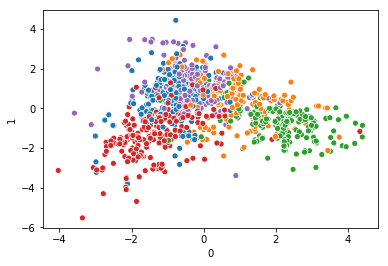

In [18]:
plt.figure()
sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


0.6742424242424242

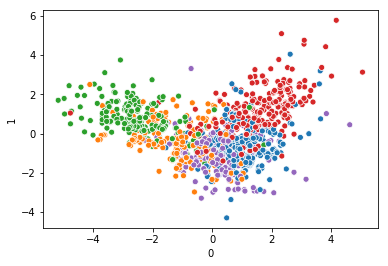

In [20]:
plt.figure()
sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


For n_clusters = 2 The average silhouette_score is : 0.43431290442919757
For n_clusters = 3 The average silhouette_score is : 0.4766437704453905
For n_clusters = 4 The average silhouette_score is : 0.38568829971550506
For n_clusters = 5 The average silhouette_score is : 0.3759570382066739
For n_clusters = 6 The average silhouette_score is : 0.35081046271280025
For n_clusters = 7 The average silhouette_score is : 0.34372597495337137
For n_clusters = 8 The average silhouette_score is : 0.3389092006892267
For n_clusters = 9 The average silhouette_score is : 0.33361949254801726


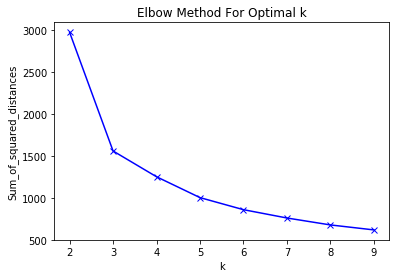

In [21]:
## Number of Cluster Analysis LDA = 2

#DECIDED ON # of Components = 2 to represent 29% of variance
# pca = PCA(n_components = 2)
# principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', ])#'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])
LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df, columns = ['principal component 1', 'principal component 2', ])

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(LDA_reduced_df)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(LDA_reduced_df, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
##CLUSTER ANALYSIS


k = 8
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(LDA_reduced_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

LDA_reduced_df['Cluster'] = labels
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']
LDA_reduced_df

principal component 1  principal component 2  Cluster  \
0                  0.511235              -1.540444        5   
1                 -0.147216              -1.905596        5   
2                 -2.813347               0.228914        6   
3                 -2.744863               0.951843        1   
4                  0.507851              -1.103884        0   
5                 -2.945012               0.585804        1   
6                 -1.946093               0.562036        6   
7                 -2.708517               0.539570        6   
8                  1.443550               0.976081        4   
9                 -0.519016              -0.078613        3   
10                -1.224865              -2.169364        3   
11                -0.073812              -0.996174        3   
12                -1.199915              -0.078887        6   
13                -1.141269              -1.600890        3   
14                -2.388061               0.447996        6   
15                -1.465485               0.580256        6   
16                -0.149213              -0.698658        3   
17                -0.241283              -1.139008        3   
18                 2.405131              -0.129690        2   
19                -0.214258              -2.779043        5   
20                 1.421618               0.506736        4   
21                 0.354243              -1.112879        0   
22                -2.278517              -0.162162        6   
23                -2.464840              -0.242503        6   
24                -1.839399              -0.047982        6   
25                -2.594643              -0.385680        6   
26                -2.780966              -0.466022        6   
27                -2.155525              -0.271501        6   
28                -1.674588               0.168268        6   
29                -1.860912               0.087926        6   
30                -1.235471               0.282447        6   
31                 1.569179               1.564212        2   
32                 0.164803              -1.494651        5   
33                -0.053707              -1.331885        3   
34                 0.601460              -2.181948        5   
35                 0.142133              -1.708134        5   
36                -0.057837              -1.552831        5   
37                 0.578790              -2.395431        5   
38                -0.164950              -1.374725        3   
39                -0.364920              -1.219421        3   
40                 0.290247              -2.069484        5   
41                 0.173818              -0.592923        3   
42                 1.870177               0.137401        2   
43                 0.711340              -0.637724        0   
44                 1.302903               0.137809        4   
45                 2.533107               3.367164        7   
46                -0.162207              -1.058596        3   
47                 0.366284              -0.688384        0   
48                 0.902888               0.727532        4   
49                 1.125547              -1.604872        5   
...                     ...                    ...      ...   
1006              -1.786998              -1.923432        3   
1007               0.349459              -0.749206        0   
1008              -1.317149               1.729533        6   
1009               0.578787              -0.884072        0   
1010               0.997594              -2.327667        5   
1011               1.684179               0.134182        2   
1012              -1.415169              -1.297232        3   
1013               2.490837              -1.803783        0   
1014              -0.248235              -0.251017        3   
1015               0.281745              -0.287669        0   
1016              -0.330716              -0.415711        3   
1017              -0.533915          

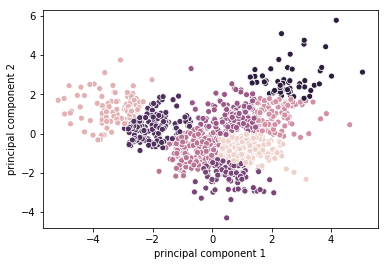

In [23]:
plt.figure()
sns.scatterplot(x='principal component 1', y ='principal component 2', hue ="Cluster", data = LDA_reduced_df, legend = False )


In [24]:
players_2018['PC1'] = LDA_reduced_df['principal component 1']
players_2018['PC2'] = LDA_reduced_df['principal component 2']
players_2018['Cluster'] = LDA_reduced_df['Cluster']

In [25]:
players_2018.to_csv('players_clustered.csv')